# Продвинутая визуализация с Matplotlib

## Домашнее задание 

### Цель домашнего задания

Отработать навык продвинутой визуализации и форматирования данных с помощью matplotlib. Научиться использовать механизмы стилизации для фокусировки внимания читателей графиков

### Описание домашнего задания и формат сдачи

Выполните предложенные задачи по визуализации данных — впишите свой код в ячейки после комментария `### YOUR CODE HERE ###` и сохраните изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) загрузите в личный кабинет и отправьте на проверку.

При построении графиков необходимо использовать объектно-ориентированный подход (задание графика через объекты Figure и Axes) везде, где это возможно. У всех графиков обязательно должен присутствовать заголовок и подписи осей. Убедитесь, что все метки и подписи осей читаемы и не накладываются друг на друга и на графики. При построении нескольких графиков в одних координатных осях должна быть легенда.

#### Описание данных

Для выполнения домашнего задания необходимо использовать датасет `vgsales.csv`, загрузка которого будет приведена ниже. Этот датасет содержит информацию о суммарных продажах видеоигр для игровых консолей. Описание признаков:
* `Rank` - порядковый номер записи в датасете
* `Name` - наименование игры
* `Platform` - платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и др.)
* `Year` - год выпуска игры
* `Genre` - жанр игры
* `Publisher` - наименование компании-издателя игры
* `NA_Sales` - объем продаж игры в Северной Америке, млн. копий
* `EU_Sales` - объем продаж игры в Европе, млн. копий
* `JP_Sales` - объем продаж игры в Японии, млн. копий
* `Other_Sales` - объем продаж игры в остальных странах, млн. копий
* `Global_Sales` - объем продаж игры по всему миру, млн. копий

### Критерии оценки

**"Зачет"** - выполнены задачи 1-6, каждый график отформатирован и читаем

**"На доработку"** - выполнены не все обязательные задачи или какой-либо из график не читаем или не подписан

### Рекомендации по выполнению

* Библиотеки, которые необходимы для выполнения домашнего задания, перечислены в ячейке ниже.
* Подсказка по работе с Jupyter: если перед графиком выводится слишком много текста, поставьте ';' в конце последней строки ячейки

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [3]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Задача 1

Постройте линейный график динамики объема продаж всех игр жанра "Sports" в Японии. Задайте графику размер 12 на 6

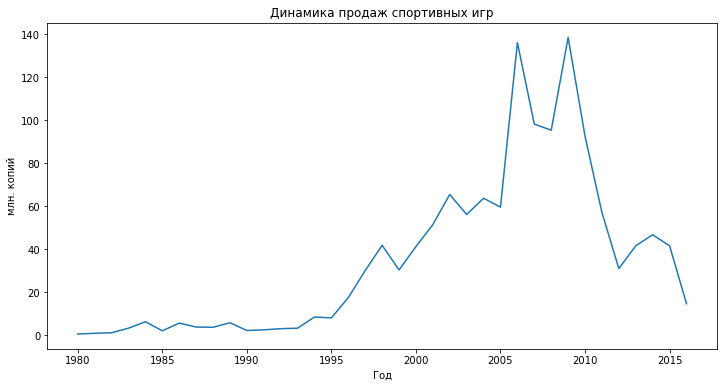

In [33]:
data1 = df[df['Genre'] == 'Sports'].groupby('Year')['Global_Sales'].sum()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data1)
ax.set_title('Динамика продаж спортивных игр')
ax.set_xlabel('Год')
ax.set_ylabel('млн. копий')

plt.show()

### Задача 2

В одних координатных осях постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

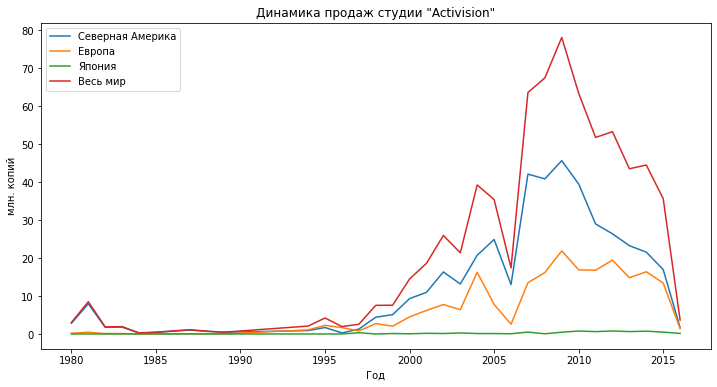

In [39]:
data2_1 = df[df['Publisher'] == 'Activision'].groupby('Year')['NA_Sales'].sum()
data2_2 = df[df['Publisher'] == 'Activision'].groupby('Year')['EU_Sales'].sum()
data2_3 = df[df['Publisher'] == 'Activision'].groupby('Year')['JP_Sales'].sum()
data2_4 = df[df['Publisher'] == 'Activision'].groupby('Year')['Global_Sales'].sum()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data2_1, label = 'Северная Америка')
ax.plot(data2_2, label = 'Европа')
ax.plot(data2_3, label = 'Япония')
ax.plot(data2_4, label = 'Весь мир')

ax.set_title('Динамика продаж студии "Activision"')
ax.set_xlabel('Год')
ax.set_ylabel('млн. копий')
ax.legend()

plt.show()

### Задача 3

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире

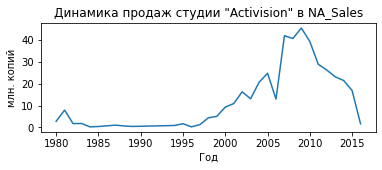

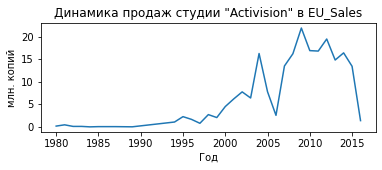

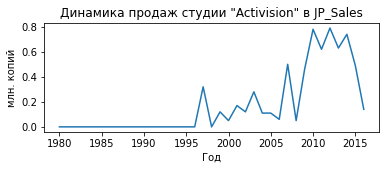

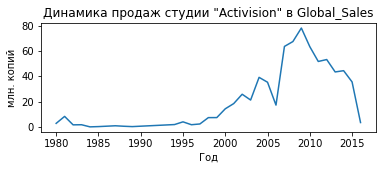

In [52]:
for country in ['NA_Sales','EU_Sales','JP_Sales','Global_Sales']: 
    data3 = df[df['Publisher'] == 'Activision'].groupby('Year')[country].sum()
    
    fig, ax = plt.subplots(figsize=(6,2))
    
    ax.plot(data3)
    ax.set_title('Динамика продаж студии "Activision" в ' + country)
    ax.set_xlabel('Год')
    ax.set_ylabel('млн. копий')
    
    plt.show()

### Задача 4

Постройте такие же линейные графики динамики продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире на одном полотне в сетке 2 на 2 графика. Итоговое полотно сделайте размером 12 на 12. Все графики должны разделять оси X и Y

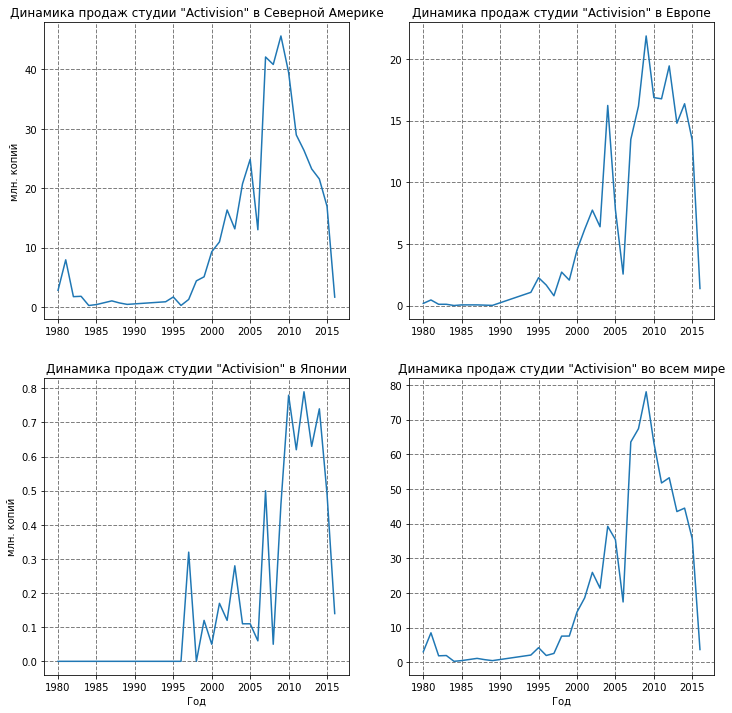

In [49]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(12,12))


data4_0 = df[df['Publisher'] == 'Activision'].groupby('Year')['NA_Sales'].sum()
data4_1 = df[df['Publisher'] == 'Activision'].groupby('Year')['EU_Sales'].sum()
data4_2 = df[df['Publisher'] == 'Activision'].groupby('Year')['JP_Sales'].sum()
data4_3 = df[df['Publisher'] == 'Activision'].groupby('Year')['Global_Sales'].sum()

ax[0][0].plot(data4_0)
ax[0][1].plot(data4_1)
ax[1][0].plot(data4_2)
ax[1][1].plot(data4_3)      

ax[0][0].grid(linewidth=1, color='gray', linestyle='--')
ax[0][1].grid(linewidth=1, color='gray', linestyle='--')
ax[1][0].grid(linewidth=1, color='gray', linestyle='--')
ax[1][1].grid(linewidth=1, color='gray', linestyle='--')

ax[0][0].set_title('Динамика продаж студии "Activision" в Северной Америке')
ax[0][1].set_title('Динамика продаж студии "Activision" в Европе')
ax[1][0].set_title('Динамика продаж студии "Activision" в Японии')
ax[1][1].set_title('Динамика продаж студии "Activision" во всем мире')
ax[1][0].set_xlabel('Год')
ax[1][1].set_xlabel('Год')
ax[0][0].set_ylabel('млн. копий')
ax[1][0].set_ylabel('млн. копий')


plt.show()

### Задача 5

В одной координатной сетке постройте 2 гистограммы распределения мировых продаж игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков

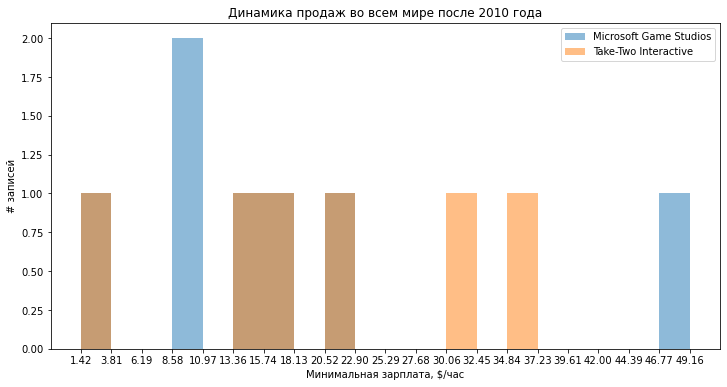

In [93]:
data5_0 = df[(df['Publisher'] == 'Microsoft Game Studios') & (df['Year'] >= 2010)].groupby('Year')['Global_Sales'].sum()
data5_1 = df[(df['Publisher'] == 'Take-Two Interactive') & (df['Year'] >= 2010)].groupby('Year')['Global_Sales'].sum()


fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data5_0, label='Microsoft Game Studios', alpha=0.5, bins = 20)
ax.hist(data5_1, label='Take-Two Interactive', alpha=0.5, bins = bins)


ax.set_title('Динамика продаж во всем мире после 2010 года')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(list(bins))
ax.legend()

plt.show()

### Задача 6

Определите 5 платформ, для которых в Японии было продано больше всего игр за все время. Проиллюстрируйте величину продаж на столбчатой диаграмме, столбец с самым высоким значением окрасьте зеленым, а с самым низким - красным

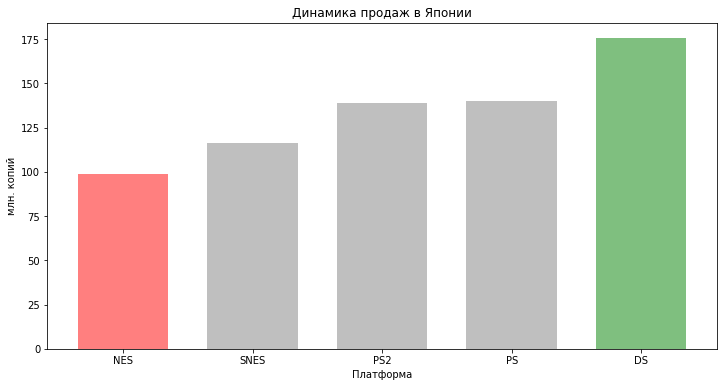

In [143]:
data6 = pd.DataFrame(df.groupby('Platform')['JP_Sales'].sum().sort_values().tail(5))
data6['Platform'] = data6.index
color=['r','grey','grey','grey','green']

fig, ax = plt.subplots(figsize=(12,6))
ax.bar(data6['Platform'], data6['JP_Sales'], width = 0.7, alpha=0.5, color = color)

ax.set_title('Динамика продаж в Японии')
ax.set_xlabel('Платформа')
ax.set_ylabel('млн. копий')

plt.show()

## Дополнительные (необязательные) задачи


### Задача 7

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зеленого полупрозрачного прямоугольника

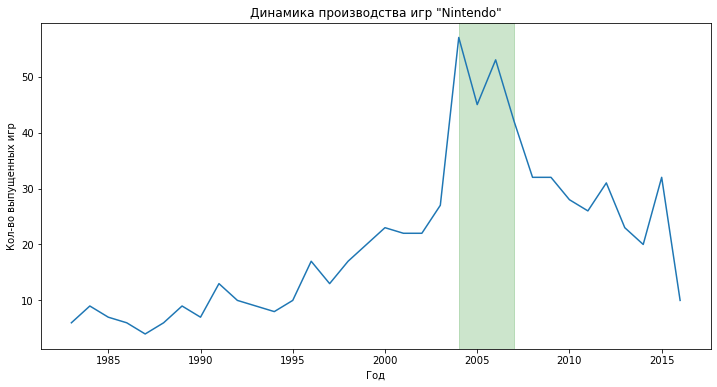

In [62]:
data7 = df[df['Publisher'] == 'Nintendo'].groupby('Year')['Name'].count().to_frame()

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(data7)
ax.axvspan(xmin = data7[data7['Name'] > 35].index.min(), xmax = data7[data7['Name'] > 35].index.max(), color='green', alpha=0.2)

ax.set_title('Динамика производства игр "Nintendo"')
ax.set_xlabel('Год')
ax.set_ylabel('Кол-во выпущенных игр')


plt.show()

### Задача 8

Определите 3 жанра и 4 издателя с самыми большими продажами игр в мире за все время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанр, издатель). Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны

<ipython-input-36-c4410a2b5a36>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data8_1 = df[(df['Publisher'] == publisher[i]) & (df['Genre'] == genre[j])].groupby('Year')['Global_Sales', 'NA_Sales'].sum()


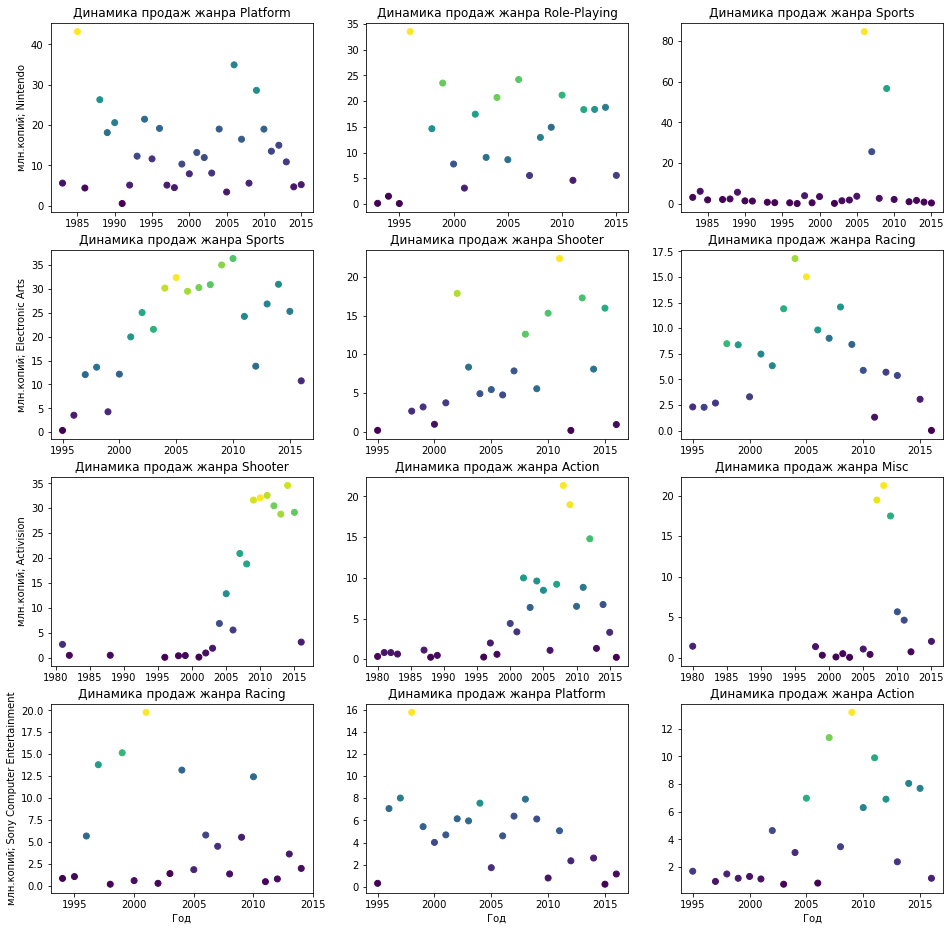

In [36]:
fig, axs = plt.subplots(figsize = (16,16), nrows = 4, ncols = 3)

publisher = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(4).index

for i in range(len(publisher)):
    genre = df[df['Publisher'] == publisher[i]].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(3).index
    
    for j in range(len(genre)):
        data8 = df[df['Publisher'] == publisher[i]].groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).head(3).index
        data8_1 = df[(df['Publisher'] == publisher[i]) & (df['Genre'] == genre[j])].groupby('Year')['Global_Sales', 'NA_Sales'].sum()
        ax = axs[i][j]
        
        ax.scatter(data8_1.index, data8_1['Global_Sales'], c = data8_1['NA_Sales'])
        ax.set_title('Динамика продаж жанра ' + genre[j])
        
        if i == len(publisher) - 1:
            ax.set_xlabel('Год')
        
        if j == 0:
            ax.set_ylabel('млн.копий; ' + publisher[i])
        
plt.show()